**IPL Win Probability Predictor**

Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008

**Objectives**
Based on the first innings performance of a team, this project is about building a model capable of predicting the win probability percentage of each team using the current data of the second innings.

The dataset consist of data about IPL matches played from the year 2008 to 2019. IPL is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. The league has 8 teams representing 8 different Indian cities or states. It enjoys tremendous popularity and the brand value of the IPL in 2019 was estimated to be ₹475 billion (US$6.7 billion). So let’s analyze IPL through stats.

In [4]:
"""
id: The IPL match id.
season: The IPL season
city: The city where the IPL match was held.
date: The date on which the match was held.
team1: One of the teams of the IPL match
team2: The other team of the IPL match
toss_winner: The team that won the toss
toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
winner: The winner of the match.
win_by_runs: Provides the runs by which the team batting first won
win_by_wickets: Provides the number of wickets by which the team batting second won.
player_of_match: The outstanding player of the match.
venue: The venue where the match was hosted.
umpire1: One of the two on-field umpires who officiate the match.
umpire2: One of the two on-field umpires who officiate the match.
umpire3: The off-field umpire who officiates the match
"""

'\nid: The IPL match id.\nseason: The IPL season\ncity: The city where the IPL match was held.\ndate: The date on which the match was held.\nteam1: One of the teams of the IPL match\nteam2: The other team of the IPL match\ntoss_winner: The team that won the toss\ntoss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’\nresult: The result(‘normal’, ‘tie’, ‘no result’) of the match.\ndl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.\nwinner: The winner of the match.\nwin_by_runs: Provides the runs by which the team batting first won\nwin_by_wickets: Provides the number of wickets by which the team batting second won.\nplayer_of_match: The outstanding player of the match.\nvenue: The venue where the match was hosted.\numpire1: One of the two on-field umpires who officiate the match.\numpire2: One of the two on-field umpires who officiate the match.\numpire3: The off-field umpire who officiates the match\n'

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,6.0,S Dhawan,DA Warner,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,7.0,S Dhawan,DA Warner,TS Mills,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,1.0,S Dhawan,DA Warner,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,2.0,DA Warner,S Dhawan,A Choudhary,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2.0,3.0,DA Warner,S Dhawan,A Choudhary,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


**Exploratory Data Analysis**

In [8]:
# Analyze the shapes of our data sets
matches.shape, deliveries.shape

((756, 18), (93057, 21))

In [9]:
# Let's work on the delivery data sets
# Get the columns of the data set
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

We are assuming that the first inning has taken place and the second inning is about to take place, so we want to see which team is winning.

In [10]:
# grouping the first inning scores and second inning scores in a particular match id
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172,in that way

total_runs_df = deliveries.groupby(['match_id', 'inning']).sum(numeric_only=True)["total_runs"].reset_index()
total_runs_df

,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0
...,...,...,...
788,391,2,139.0
789,392,1,154.0
790,392,2,158.0
791,393,1,145.0


In [11]:
# Extracting only the first innings as we will be predicting the second innings
total_runs_df= total_runs_df[total_runs_df['inning']==1]
total_runs_df.head()

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0


In [12]:
# we are adding 1 to total runs because for the second team to win they must get more runs than the first team
total_runs_df['total_runs'] = total_runs_df['total_runs'].apply(lambda x:x+1)
total_runs_df.head()

<ipython-input-12-e743949b6f5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_runs_df['total_runs'] = total_runs_df['total_runs'].apply(lambda x:x+1)


,match_id,inning,total_runs
0,1,1,208.0
2,2,1,185.0
4,3,1,184.0
6,4,1,164.0
8,5,1,158.0


In [13]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

We have gotten the total runs for the first inning of each match, we will now merge this data frame with the matches data frame. A left side merging will be done on the "id" column of the matches data frame and a right side merge will be done on the "match_id" of the total_run_df

In [14]:
# merge the matches df and the total_runs_df

match_df = matches.merge(total_runs_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')

match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158.0


In [15]:
# replacing the old name Delhi Daredevils with new name Delhi Capitals
match_df['team1'] = match_df['team1'].replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].replace('Delhi Daredevils', 'Delhi Capitals')

# replacing the old name Deccan Chargers with new name Sunrises Hyderabad
match_df['team1'] = match_df['team1'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [16]:
# lets examine the teams that we have
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [17]:
# we will consider the most frequently participating teams.
frequents = [match_df['team1'].value_counts()[:8]]
frequents

[team1
 Sunrisers Hyderabad            53
 Chennai Super Kings            51
 Mumbai Indians                 47
 Kolkata Knight Riders          46
 Kings XI Punjab                45
 Royal Challengers Bangalore    39
 Rajasthan Royals               38
 Delhi Capitals                 37
 Name: count, dtype: int64]

In [18]:
teams = ['Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings', 'Royal Challengers Bangalore',
         'Kolkata Knight Riders', 'Delhi Capitals', 'Rajasthan Royals','Sunrisers Hyderabad']

In [19]:
# We will only concidered the frequently occuring teams
# Which are mentioned in the teams list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [20]:
# Investigate the shape of our data frame
match_df.shape

(319, 20)

In [21]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159.0


The Duckworth–Lewis–Stern method (DLS) is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match **interrupted by weather or other circumstances**. It is generally accepted to be the most accurate method of setting a target score.

In [22]:
# Check that a match resulted in a Duckworth-Lewis-Stern
match_df[match_df['dl_applied']==1].style.background_gradient(cmap="plasma")

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129.000000
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119.000000
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150.000000
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105.000000
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159.000000
148,149,IPL-2009,Centurion,07-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186.000000
280,281,IPL-2011,Kolkata,07-05-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115.000000
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90.000000


In [23]:
# We will drop all row that matches were considered by dl method considering onlt matches that were completed
match_df = match_df[match_df['dl_applied']==0]
match_df['dl_applied'].unique()

array([0])

In [24]:
#for this analysis we will consider match_id, city, winner and total_runs
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]
match_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208.0
4,5,Bangalore,Royal Challengers Bangalore,158.0
6,7,Mumbai,Mumbai Indians,179.0
7,8,Indore,Kings XI Punjab,149.0
9,10,Mumbai,Mumbai Indians,159.0


The above features are what we need from the match_df. More important features will be extracted from the deliveries dataframe

In [25]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


The two dataframes have the match_id column. Therefore we will combine both of them.

In [26]:
#merge match_df and deliveries
deliveries_df = deliveries.merge(match_df, on="match_id")
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,2.0,2.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0


In [27]:
# View the columns of our newly merged data frame
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs_x', 'player_dismissed',
       'dismissal_kind', 'fielder', 'city', 'winner', 'total_runs_y'],
      dtype='object')

Our initial data frame only contains total runs of first innings, this is because we want to predict the total runs of second innings. Now we will consider the second innings.

In [28]:
#considering second inning
deliveries_df = deliveries_df[deliveries_df['inning']==2]

In [29]:
deliveries_df.shape

(35996, 24)

By observing, we can see that in the match_df, we had taken first innings total_runs, and in the second case, that is the delivery_df, we considered the second innings runs because our main aim is to find the probability of either teams winning or loosing the match.

For this, we need current runs and run rate. For current runs, we apply groupby on match_id and take the cumulative sum with respect to total_runs_x. Total_runs was present match_df as well as deliveries dataframe, but as we merged the two dataframes, it resulted in total_runs_y for match_df and total_runs_x for deliveries dataframe. Therefore, total_run_y is the first innings runs and total_runs_x are the second innings runs, ball by ball. By applying cumulative sum, this runs becomes the current score.

total_runs_x gives the runs scored after each ball, therefore in the second innings, we want to get the total second inning runs.Therefore we will groupby match_id and will apply the cumulative sum.

In [30]:
# current score of a particular match
deliveries_df['current_score'] = deliveries_df.groupby(['match_id']).cumsum(numeric_only = True)['total_runs_x']

deliveries_df.head()

<ipython-input-30-f65525aa9465>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_df['current_score'] = deliveries_df.groupby(['match_id']).cumsum(numeric_only = True)['total_runs_x']


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y,current_score
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,Mandeep Singh,A Nehra,0.0,...,1.0,0.0,1.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,2.0,0.0,2.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,3.0
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,4.0,0.0,4.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,7.0


In [31]:
# Calculate the runs left to chase
deliveries_df['runs_left'] = deliveries_df['total_runs_y'] - deliveries_df['current_score']
deliveries_df.head()

<ipython-input-31-60ab87284532>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_df['runs_left'] = deliveries_df['total_runs_y'] - deliveries_df['current_score']


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y,current_score,runs_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,Mandeep Singh,A Nehra,0.0,...,0.0,1.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,2.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,3.0,205.0
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,4.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,7.0,201.0


if one ball is played,then balls left = 120-1 = 119........(1) if two balls are played,then balls left = 120-2 = 118

so similarly if over=1,over has 6 balls right,so 1*6 = 6 now,ball = 1,so 6+1 = 7,now 126-7 = 119,which is same as (1)

so we'll use balls_left = 126-(over*6+current_ball)

In [32]:
#calculate total balls left
deliveries_df['balls_left'] = 126 - (deliveries_df['over'] * 6 + deliveries_df['ball'])
deliveries_df.head()

<ipython-input-32-030dd6f4d015>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_df['balls_left'] = 126 - (deliveries_df['over'] * 6 + deliveries_df['ball'])


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y,current_score,runs_left,balls_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,Mandeep Singh,A Nehra,0.0,...,1.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,119.0
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,118.0
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,0.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,117.0
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,2.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,3.0,205.0,116.0
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,4.0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208.0,7.0,201.0,115.0


In [33]:
#check the players dissmissed
list(deliveries_df['player_dismissed'].unique()[:5])

[nan, 'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head']

`Nan` represents that the player was not dismissed and a name indicates that the player was dismissed. We want to replace `Nan` with 0 and a players name with 1

In [34]:
 # Fill nan values with zero
 deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna('0')

 #Fill the cases a player was dissmissed with 1
 deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna('0').apply(lambda x:x if x=='0' else '1')

 # Convert the string to an integer
 deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].astype(int)

 #Check the unique values
 deliveries_df['player_dismissed'].unique()





array([0, 1])

In [35]:
deliveries_df['player_dismissed'].unique()

array([0, 1])

In [36]:
# wickets fallen
wickets = deliveries_df.groupby('match_id').cumsum(numeric_only=True)['player_dismissed'].values

# a wicket = 10
deliveries_df['wickets'] = 10-wickets

deliveries_df['wickets'].unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [37]:
# current run rate

deliveries_df['cur_run_rate'] = (deliveries_df['current_score']*6)/(120-deliveries_df['balls_left'])

# required run rate

deliveries_df['req_run_rate'] = (deliveries_df['runs_left']*6)/(deliveries_df['balls_left'])


deliveries_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,fielder,city,winner,total_runs_y,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,Mandeep Singh,A Nehra,0.0,...,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,119.0,10,6.0,10.436975
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,118.0,10,3.0,10.525424
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,NaN,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,117.0,10,2.0,10.615385


In [38]:
# function
def result_fnc(row):
  return 1 if row['batting_team'] == row['winner'] else 0


In [39]:
deliveries_df['result'] = deliveries_df.apply(result_fnc, axis=1)

deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,city,winner,total_runs_y,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,Mandeep Singh,A Nehra,0.0,...,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,119.0,10,6.0,10.436975,0
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,118.0,10,3.0,10.525424,0
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,Hyderabad,Sunrisers Hyderabad,208.0,1.0,207.0,117.0,10,2.0,10.615385,0
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,Hyderabad,Sunrisers Hyderabad,208.0,3.0,205.0,116.0,10,4.5,10.603448,0
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,CH Gayle,A Nehra,0.0,...,Hyderabad,Sunrisers Hyderabad,208.0,7.0,201.0,115.0,10,8.4,10.486957,0


In [40]:
deliveries_df['result'].unique()

array([0, 1])

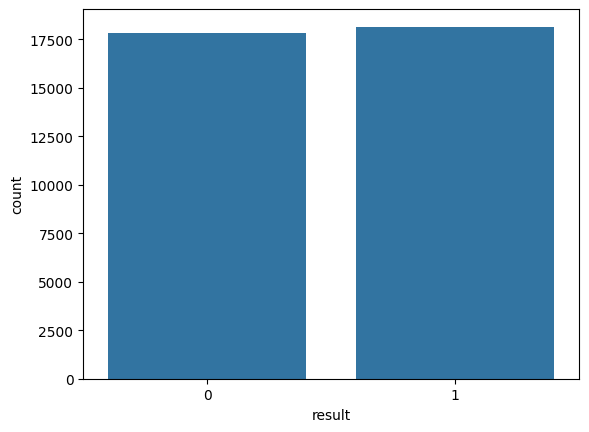

In [41]:
# get the results countplot
sns.countplot(x="result", data=deliveries_df);

In [42]:
# Select only specific columns
final_df = deliveries_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119.0,10,1.0,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118.0,10,0.0,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117.0,10,0.0,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116.0,10,2.0,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115.0,10,4.0,8.4,10.486957,0


In [43]:
final_df.shape

(35996, 10)

** Model Building**

In [44]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
cur_run_rate,0
req_run_rate,4
result,0


In [45]:
final_df = final_df.dropna()

final_df.isnull().sum()


,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
cur_run_rate,0
req_run_rate,0
result,0


In [47]:
final_df["balls_left"].value_counts()

,count
balls_left,
107.0,400
101.0,392
113.0,390
71.0,371
95.0,368
...,...
2.0,153
1.0,139
0.0,122


In [48]:
# select rows that balls_left is not equal to zero
final_df = final_df[final_df['balls_left'] != 0]

In [49]:
# Create a copy of the dataset
data = final_df.copy()

y = data["result"]

X = data.drop(["result"], axis=1)

X.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119.0,10,1.0,6.0,10.436975
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118.0,10,0.0,3.0,10.525424
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117.0,10,0.0,2.0,10.615385
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116.0,10,2.0,4.5,10.603448
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115.0,10,4.0,8.4,10.486957


In [50]:
y.head()

,result
125,0
126,0
127,0
128,0
129,0


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [55]:
X_train.shape, X_test.shape

((25109, 9), (10761, 9))

In [56]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [57]:
# import model building libriaries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [58]:
# batting team,bowling team and city are categorical columns
# they will be converted to numeric using onehot encoder
ct = ColumnTransformer([
    ("trf", OneHotEncoder(sparse_output=False, drop="first"),
     ['batting_team','bowling_team','city'])
], remainder="passthrough")

In [59]:
# Create the Pipeline

pipe = Pipeline(steps=[
    ("step1",ct),
    ("step2",LogisticRegression(solver="liblinear"))
])

# fitting the training data
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [60]:
y_pred = pipe.predict(X_test)

print(metrics.accuracy_score(y_pred, y_test))

0.8248304060960877


In [62]:
# view a sample prediction probability
pipe.predict_proba(X_test)[15]


array([0.86932478, 0.13067522])

In [63]:
# now let's fiit a random forest model
# Create the Pipeline

pipe2 = Pipeline(steps=[
    ("step1",ct),
    ("step2",RandomForestClassifier())
])

# fitting the training data
pipe2.fit(X_train, y_train)

y_pred2 = pipe2.predict(X_test)

print(metrics.accuracy_score(y_pred2, y_test))

0.9980485085029273


In [64]:
# making the same prediction probability with RF model
pipe2.predict_proba(X_test)[15]

array([0.05, 0.95])

We will go with the Logistic Regression Model because we need to showcase the probability. Though Random Forest Model is giving a much accurate result, bit it is being biased to one of the teams. Therefore it is better to use a model which gives "Equal Justice" towards both sides as we do not know which team will out perform and win the game in the second inning!

In [65]:
# saving the logistic regression model

import pickle

pickle.dump(pipe, open("pipe.pkl", "wb"))